In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Load libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



# load Data(train and teat)


In [3]:
df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Explore the Training Data

In [4]:
df_test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
629,2090,75,RM,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1068,2529,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
1160,2621,60,RL,NaN,13041,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal
282,1743,160,FV,35.0,3768,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
1345,2806,30,RL,50.0,5220,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal


In [5]:
df_submission.sample(5)

,Id,SalePrice
533,1994,198168.490116
83,1544,154034.917446
1396,2857,176487.943175
1221,2682,196264.754980
1447,2908,187709.555004


In [6]:
# Copy the Training Dataset
df=df_train.copy()


In [7]:
# Copy the Training Dataset
df_t=df_test.copy()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
numeric_columns_count = df.select_dtypes(include=['object']).shape[1]

print("Number of columns with int and float data types:", numeric_columns_count)


Number of columns with int and float data types: 43


In [10]:
numeric_columns_count = df.select_dtypes(include=['int', 'float']).shape[1]

print("Number of columns with int and float data types:", numeric_columns_count)


Number of columns with int and float data types: 38


In [11]:
null_columns = df.columns[df.isnull().any()]

# Display the columns with null values, their corresponding counts, and data types
for column in null_columns:
    print(f"Column '{column}' with data type {df[column].dtype} has {df[column].isnull().sum()} null values.")


Column 'LotFrontage' with data type float64 has 259 null values.
Column 'Alley' with data type object has 1369 null values.
Column 'MasVnrType' with data type object has 872 null values.
Column 'MasVnrArea' with data type float64 has 8 null values.
Column 'BsmtQual' with data type object has 37 null values.
Column 'BsmtCond' with data type object has 37 null values.
Column 'BsmtExposure' with data type object has 38 null values.
Column 'BsmtFinType1' with data type object has 37 null values.
Column 'BsmtFinType2' with data type object has 38 null values.
Column 'Electrical' with data type object has 1 null values.
Column 'FireplaceQu' with data type object has 690 null values.
Column 'GarageType' with data type object has 81 null values.
Column 'GarageYrBlt' with data type float64 has 81 null values.
Column 'GarageFinish' with data type object has 81 null values.
Column 'GarageQual' with data type object has 81 null values.
Column 'GarageCond' with data type object has 81 null values.


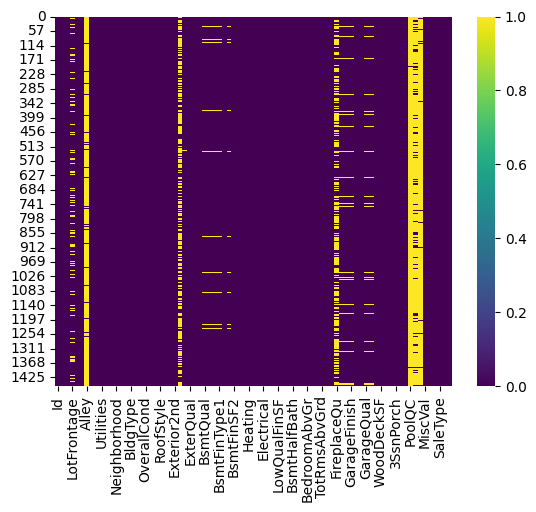

In [12]:
# Missing Values plot
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

# Dealing data < the correlation threshold

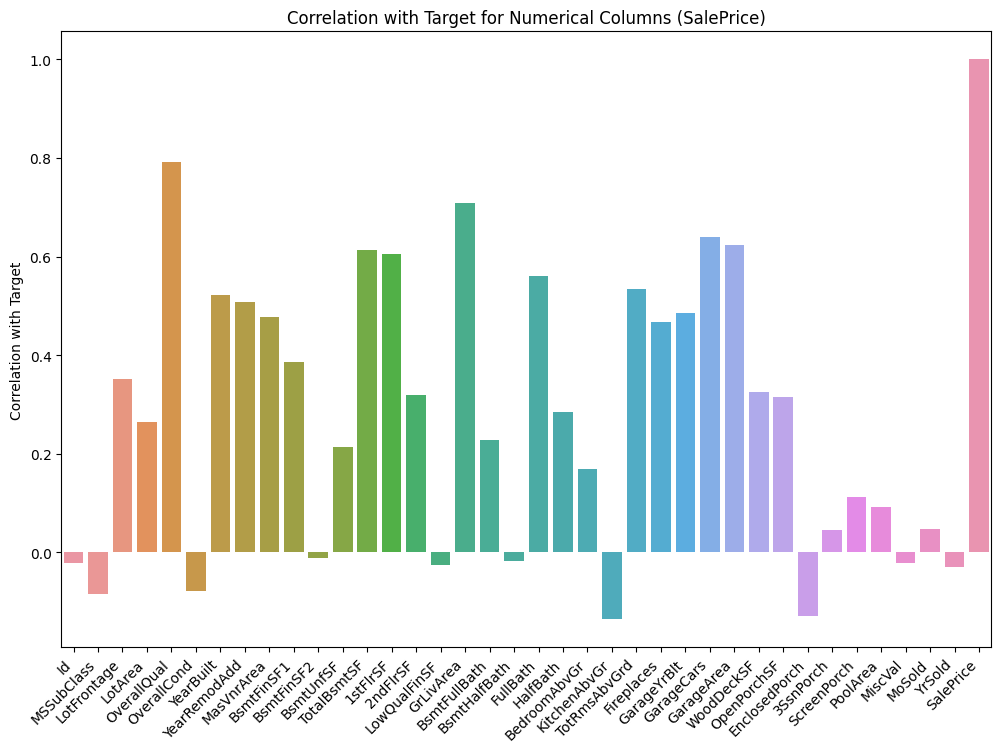

In [13]:

target_column = 'SalePrice'  # Replace with your actual target column name

numeric_columns = df.select_dtypes(include=['int', 'float'])

# Compute the correlation between the target column and all other numerical columns
correlation_with_target = numeric_columns.corrwith(df[target_column])

# Set the correlation threshold
corr_threshold = .4

columns_to_drop = correlation_with_target[(correlation_with_target >= -corr_threshold) & (correlation_with_target <= corr_threshold)].index


# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Create a DataFrame for visualization
correlation_df = pd.DataFrame({'Correlation with Target': correlation_with_target})

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
sns.barplot(x=correlation_df.index, y='Correlation with Target', data=correlation_df)

# Show the plot
plt.title(f'Correlation with Target for Numerical Columns ({target_column})')
plt.xticks(rotation=45, ha='right')
plt.show()


In [14]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Display information for numerical columns
df_numerical = df[numerical_columns]
df_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   YearBuilt     1460 non-null   int64  
 2   YearRemodAdd  1460 non-null   int64  
 3   MasVnrArea    1452 non-null   float64
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   Fireplaces    1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  GarageCars    1460 non-null   int64  
 12  GarageArea    1460 non-null   int64  
 13  SalePrice     1460 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 159.8 KB


In [15]:
df[['MasVnrArea','GarageYrBlt']]

,MasVnrArea,GarageYrBlt
0,196.0,2003.0
1,0.0,1976.0
2,162.0,2001.0
3,0.0,1998.0
4,350.0,2000.0
...,...,...
1455,0.0,1999.0
1456,119.0,1978.0
1457,0.0,1941.0
1458,0.0,1950.0


In [16]:
# Drop rows where 'MasVnrArea' has null values
df = df.dropna(subset=['MasVnrArea'])


In [17]:
df[['GarageYrBlt']].value_counts()

GarageYrBlt
2005.0         65
2006.0         58
2004.0         53
2003.0         49
2007.0         46
               ..
1908.0          1
1906.0          1
1900.0          1
1927.0          1
1933.0          1
Name: count, Length: 97, dtype: int64

In [18]:
# Calculate the mode of the 'YearBuilt' column
year_built_mode = df['GarageYrBlt'].mode()[0]

# Impute missing values with the mode
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(year_built_mode)

In [19]:
# Drop rows where 'GarageYrBlt' has NaN values
df = df.dropna(subset=['GarageYrBlt'])

# Convert 'GarageYrBlt' column from float to int
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [20]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Display information for numerical columns
df_numerical = df[numerical_columns]
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1452 non-null   int64  
 1   YearBuilt     1452 non-null   int64  
 2   YearRemodAdd  1452 non-null   int64  
 3   MasVnrArea    1452 non-null   float64
 4   TotalBsmtSF   1452 non-null   int64  
 5   1stFlrSF      1452 non-null   int64  
 6   GrLivArea     1452 non-null   int64  
 7   FullBath      1452 non-null   int64  
 8   TotRmsAbvGrd  1452 non-null   int64  
 9   Fireplaces    1452 non-null   int64  
 10  GarageYrBlt   1452 non-null   int64  
 11  GarageCars    1452 non-null   int64  
 12  GarageArea    1452 non-null   int64  
 13  SalePrice     1452 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 170.2 KB


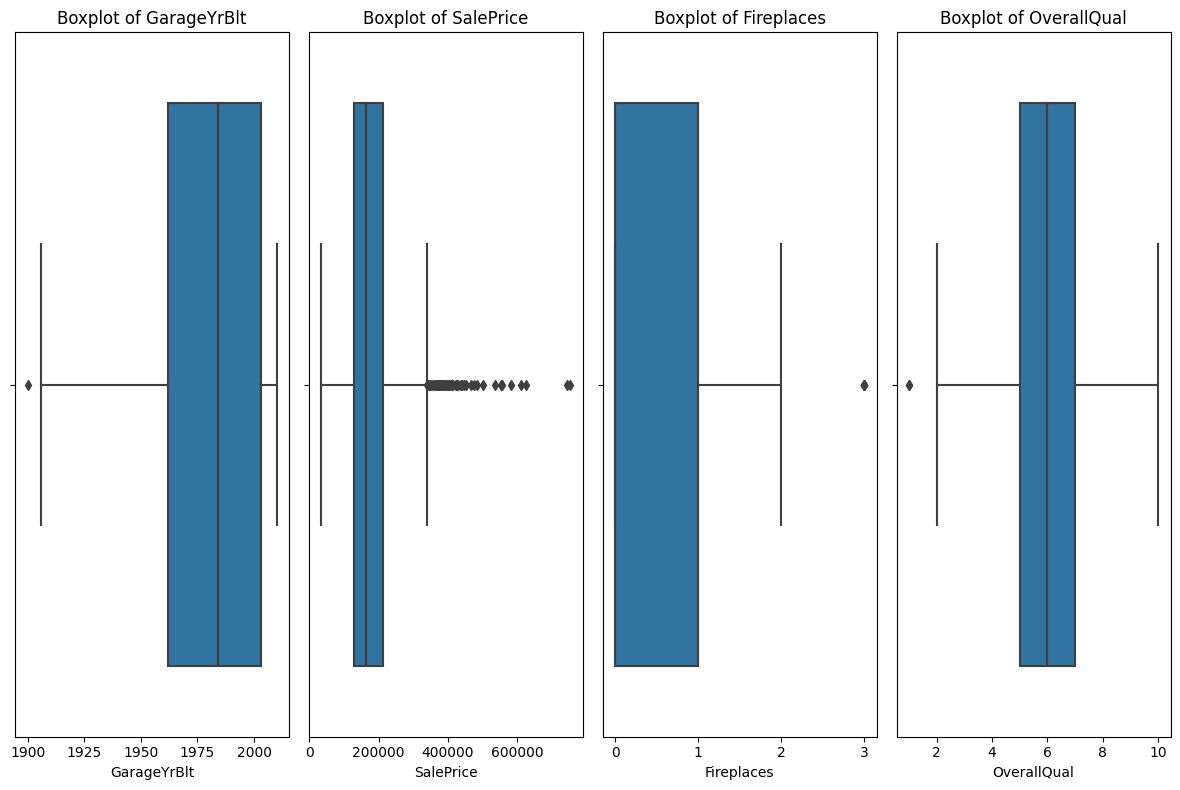

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
columns_of_interest = ['GarageYrBlt', 'SalePrice', 'Fireplaces' , 'OverallQual']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots for each column
for column_name in columns_of_interest:
    plt.subplot(1, len(columns_of_interest), columns_of_interest.index(column_name) + 1)
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')

plt.tight_layout()
plt.show()


In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Numerical columns
numerical_columns = ['OverallQual', 'YearBuilt','MasVnrArea',
                     'SalePrice',]

# Create subplots with 2 columns
fig = make_subplots(rows=len(numerical_columns)//2, cols=2, subplot_titles=numerical_columns)

# Loop through each numerical column and add its boxplot to the subplot
for i, column in enumerate(numerical_columns):
    row = i // 2 + 1  # Calculate row number for subplot
    col = i % 2 + 1   # Calculate column number for subplot
    fig.add_trace(go.Box(y=df[column], name=column), row=row, col=col)

# Update layout
fig.update_layout(height=750, width=1200, title_text="Boxplots of Numerical Columns")

# Show plot
fig.show()


In [23]:
outlier_percentage = {}

for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage[col] = len(outliers) / len(df) * 100

print("Outlier Percentage:")
for col, percentage in outlier_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Outlier Percentage:
OverallQual: 0.14%
YearBuilt: 0.48%
MasVnrArea: 6.61%
SalePrice: 4.13%


In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Assuming `df` is your DataFrame
numerical_columns = df.select_dtypes(include=['float', 'int']).columns
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Apply scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [25]:
null_columns = df.columns[df.isnull().any()]

# Display the columns with null values, their corresponding counts, and data types
for column in null_columns:
    print(f"Column '{column}' with data type {df[column].dtype} has {df[column].isnull().sum()} null values.")


Column 'Alley' with data type object has 1362 null values.
Column 'MasVnrType' with data type object has 864 null values.
Column 'BsmtQual' with data type object has 37 null values.
Column 'BsmtCond' with data type object has 37 null values.
Column 'BsmtExposure' with data type object has 38 null values.
Column 'BsmtFinType1' with data type object has 37 null values.
Column 'BsmtFinType2' with data type object has 38 null values.
Column 'Electrical' with data type object has 1 null values.
Column 'FireplaceQu' with data type object has 686 null values.
Column 'GarageType' with data type object has 81 null values.
Column 'GarageFinish' with data type object has 81 null values.
Column 'GarageQual' with data type object has 81 null values.
Column 'GarageCond' with data type object has 81 null values.
Column 'PoolQC' with data type object has 1445 null values.
Column 'Fence' with data type object has 1171 null values.
Column 'MiscFeature' with data type object has 1398 null values.


# Dealing with CAT and object data

In [26]:
# Assuming 'df' is your DataFrame
columns_with_missing_values = df.columns[df.isnull().any()]

# Drop columns with missing values
df = df.drop(columns=columns_with_missing_values)

In [27]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Histogram of SalesPrice')

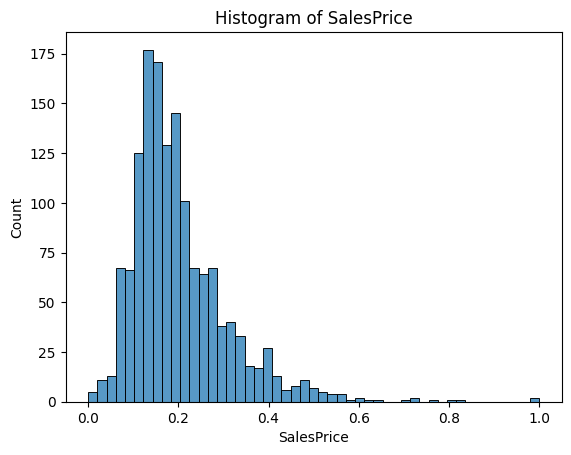

In [28]:
# Lets Make the Histogram of Salesprice column
sns.histplot(data=df, x="SalePrice")
plt.xlabel('SalesPrice')
plt.ylabel('Count')
plt.title('Histogram of SalesPrice')

In [29]:
object_columns = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=object_columns, drop_first=True)


In [30]:
# Assuming 'df' is your DataFrame
boolean_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to integer
df[boolean_columns] = df[boolean_columns].astype(int)




In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1459
Columns: 169 entries, OverallQual to SaleCondition_Partial
dtypes: float64(14), int64(155)
memory usage: 1.9 MB


In [32]:
df.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1300,0.666667,0.920290,0.816667,0.215000,0.160065,0.153970,0.310663,0.666667,0.583333,0.333333,...,0,0,0,0,1,0,0,0,1,0
1316,0.777778,0.985507,0.966667,0.168750,0.265466,0.297384,0.244160,0.666667,0.500000,0.333333,...,0,0,0,0,1,0,0,0,1,0
520,0.333333,0.202899,0.833333,0.000000,0.000000,0.082607,0.180859,0.666667,0.416667,0.000000,...,0,0,0,0,1,0,0,0,1,0
91,0.444444,0.644928,0.183333,0.126875,0.202128,0.206746,0.169744,0.333333,0.333333,0.000000,...,0,0,0,0,1,0,0,0,0,0
639,0.777778,0.971014,0.933333,0.000000,0.248773,0.282928,0.232291,0.666667,0.416667,0.333333,...,0,0,1,0,0,0,0,0,0,1


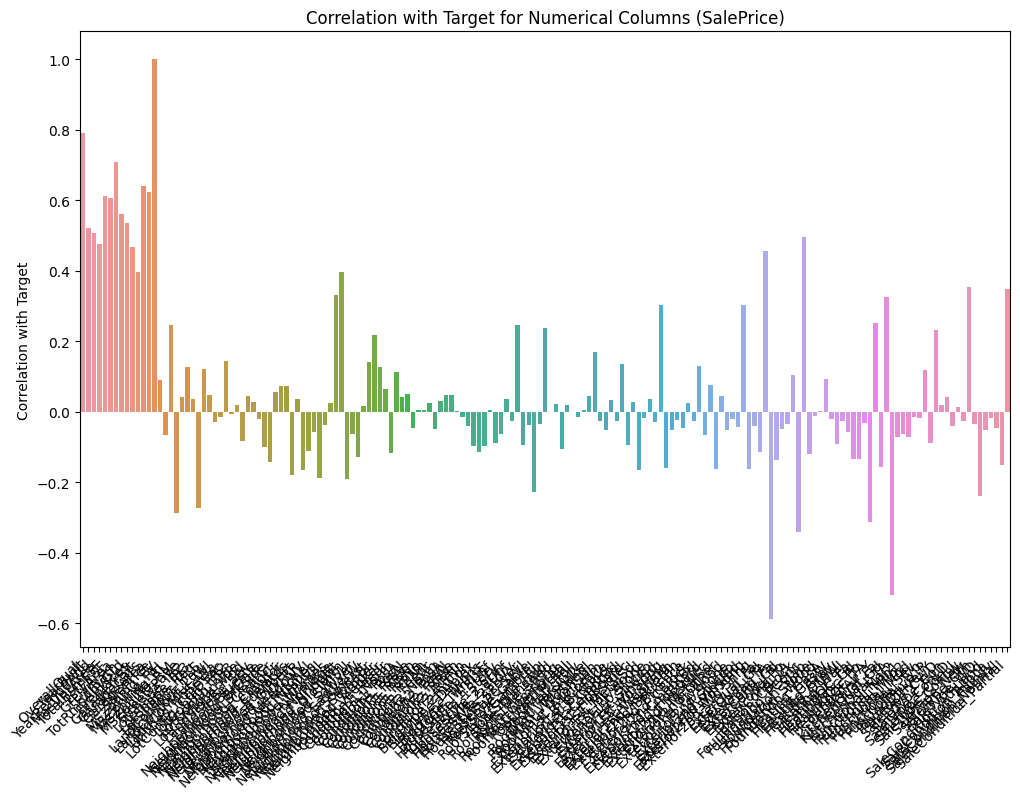

In [33]:

target_column = 'SalePrice'  # Replace with your actual target column name

numeric_columns = df.select_dtypes(include=['int', 'float'])

# Compute the correlation between the target column and all other numerical columns
correlation_with_target = numeric_columns.corrwith(df[target_column])

# Set the correlation threshold
corr_threshold = .2

columns_to_drop = correlation_with_target[(correlation_with_target >= -corr_threshold) & (correlation_with_target <= corr_threshold)].index


# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Create a DataFrame for visualization
correlation_df = pd.DataFrame({'Correlation with Target': correlation_with_target})

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot using seaborn
sns.barplot(x=correlation_df.index, y='Correlation with Target', data=correlation_df)

# Show the plot
plt.title(f'Correlation with Target for Numerical Columns ({target_column})')
plt.xticks(rotation=45, ha='right')
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1452 non-null   float64
 1   YearBuilt              1452 non-null   float64
 2   YearRemodAdd           1452 non-null   float64
 3   MasVnrArea             1452 non-null   float64
 4   TotalBsmtSF            1452 non-null   float64
 5   1stFlrSF               1452 non-null   float64
 6   GrLivArea              1452 non-null   float64
 7   FullBath               1452 non-null   float64
 8   TotRmsAbvGrd           1452 non-null   float64
 9   Fireplaces             1452 non-null   float64
 10  GarageYrBlt            1452 non-null   float64
 11  GarageCars             1452 non-null   float64
 12  GarageArea             1452 non-null   float64
 13  SalePrice              1452 non-null   float64
 14  MSZoning_RL            1452 non-null   int64  
 15  MSZoning_

In [35]:
X_test=df_t[['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',
        '1stFlrSF','GrLivArea','FullBath', 'TotRmsAbvGrd','Fireplaces','GarageCars']]

In [36]:
# Assuming 'df' is your DataFrame
median_values = X_test.median()

# Fill missing values with the median
X_test = X_test.fillna(median_values)

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   MasVnrArea    1459 non-null   float64
 4   TotalBsmtSF   1459 non-null   float64
 5   1stFlrSF      1459 non-null   int64  
 6   GrLivArea     1459 non-null   int64  
 7   FullBath      1459 non-null   int64  
 8   TotRmsAbvGrd  1459 non-null   int64  
 9   Fireplaces    1459 non-null   int64  
 10  GarageCars    1459 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 125.5 KB


In [38]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [39]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'LinearRegression': (LinearRegression(), {}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'criterion': ['squared_error', 'absolute_error']}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [10, 50], 'max_depth': [3, 4]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': np.arange(2, 5, 9), 'weights': ['uniform']}),
    'SVR': (SVR(), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1], 'gamma': [0.1, 0.01]}),
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [10, 50], 'loss': ['ls', 'lad', 'huber', 'quantile']}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(),
                                   {'n_estimators': [10, 50], 'learning_rate': [0.1, 0.01, 0.001]})
}

best_rmse = float('inf')
best_model = None

for name, (model, param_grid) in models.items():
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=2)

    # Train the model
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Evaluate the model
    mse= mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae= mean_absolute_error(y_test, y_pred)
    print(f"Model: {name}")
    print('mean_absolute_error:', mae)
    print('mean_squared_error:', mse)
    print('Root_mean_squared_error:', rmse)
    # Calculate the combined score
    score = mae + mse + rmse
    print('Combined Score:', score)
    print('----------------------------------------')

    # Check if this model has the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = grid_search.best_estimator_

    # Print the best parameters and best model
    print(name, 'Best parameters:', grid_search.best_params_)
    print('\n')

# Print the best model based on RMSE
print(f"Best model based on RMSE: {best_model}")
    

Model: Ridge
mean_absolute_error: 0.027693575371207507
mean_squared_error: 0.0016217521175751204
Root_mean_squared_error: 0.04027098356850898
Combined Score: 0.0695863110572916
----------------------------------------
Ridge Best parameters: {'alpha': 1}


Model: LinearRegression
mean_absolute_error: 0.027292812015173563
mean_squared_error: 0.0016036929376041901
Root_mean_squared_error: 0.04004613511444257
Combined Score: 0.06894264006722033
----------------------------------------
LinearRegression Best parameters: {}


Model: DecisionTreeRegressor
mean_absolute_error: 0.034552016687258505
mean_squared_error: 0.0031195336960947503
Root_mean_squared_error: 0.05585278592957338
Combined Score: 0.09352433631292664
----------------------------------------
DecisionTreeRegressor Best parameters: {'criterion': 'absolute_error'}


Model: RandomForestRegressor
mean_absolute_error: 0.029825397328242267
mean_squared_error: 0.0019382587935740144
Root_mean_squared_error: 0.04402566062620769
Combined 

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:45:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:45:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:45:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:45:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:45:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[22:45:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.


/opt

Model: XGBRegressor
mean_absolute_error: 0.026523801893428692
mean_squared_error: 0.0019456161645028728
Root_mean_squared_error: 0.04410913924010389
Combined Score: 0.07257855729803545
----------------------------------------
XGBRegressor Best parameters: {'loss': 'ls', 'n_estimators': 50}


Model: GradientBoostingRegressor
mean_absolute_error: 0.025037555130042737
mean_squared_error: 0.0014393136121354142
Root_mean_squared_error: 0.03793828688983484
Combined Score: 0.06441515563201299
----------------------------------------
GradientBoostingRegressor Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


Best model based on RMSE: GradientBoostingRegressor(n_estimators=50)
